## Line Plots

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

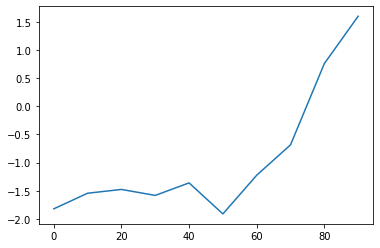

In [0]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()  #makes line plot: series

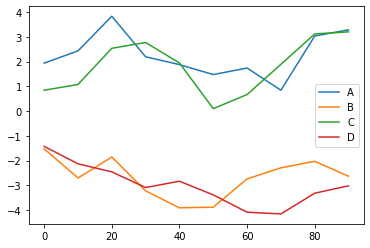

In [0]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot() #line plor:dataframe
#df.plot() is equivalent to df.plot.line()

## Bar Plots

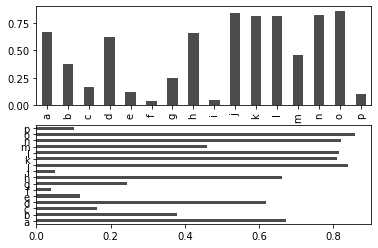

In [0]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)#k fills color, alpha is transperancy
#bar is vertical, barh is horizontal

Genus         A         B         C         D
one    0.108301  0.179000  0.512762  0.282263
two    0.710370  0.891741  0.712169  0.413241
three  0.692206  0.669669  0.941459  0.379702
four   0.848751  0.150932  0.118089  0.860063
five   0.480815  0.996400  0.587423  0.529917
six    0.061024  0.889001  0.149172  0.885127


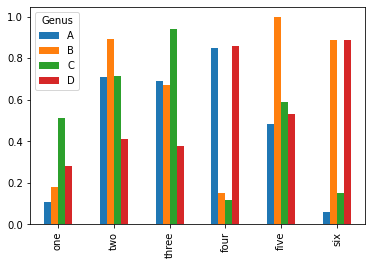

In [0]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
print(df)
df.plot.bar()

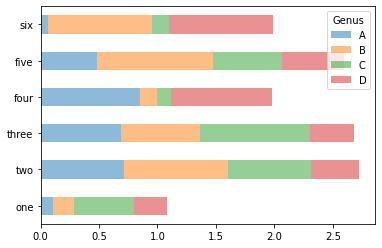

In [0]:
df.plot.barh(stacked=True, alpha=0.5)

size         1         2         3         4         5         6
fri   0.233781  0.814670  0.942487  0.857058  0.576015  0.618595
sat   0.768879  0.293185  0.064861  0.477568  0.655954  0.708175
sun   0.342013  0.029332  0.823498  0.989636  0.272236  0.788660
thu   0.204278  0.862085  0.653296  0.434866  0.855728  0.363201
size         1         2         3         4         5         6
fri   0.057829  0.201521  0.233139  0.212006  0.142486  0.153019
sat   0.259002  0.098761  0.021849  0.160872  0.220963  0.238553
sun   0.105385  0.009038  0.253745  0.304937  0.083884  0.243010
thu   0.060554  0.255550  0.193658  0.128908  0.253665  0.107664


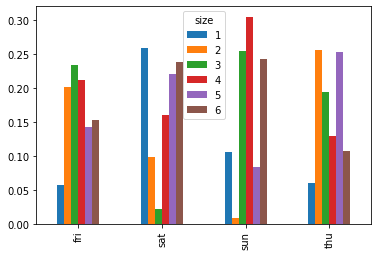

In [0]:
party_counts = pd.DataFrame(np.random.rand(4, 6),
                  index=(['fri', 'sat', 'sun', 'thu']),
                  columns=pd.Index(['1', '2', '3', '4','5','6'], name='size'))
print(party_counts)
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
print(party_pcts)
party_pcts.plot.bar()

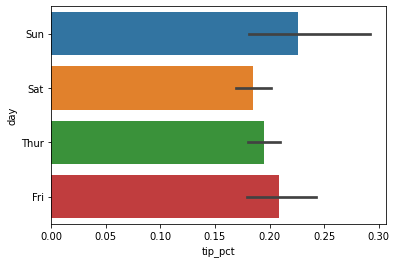

In [0]:
import seaborn as sns
tips = pd.read_csv('tips.csv')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

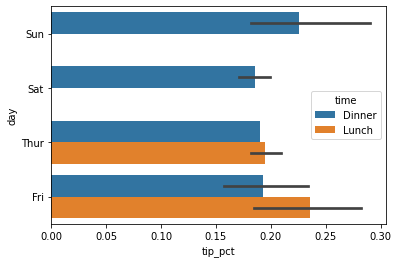

In [0]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [0]:
#sns.set(style="whitegrid")

## Histograms and Density Plots

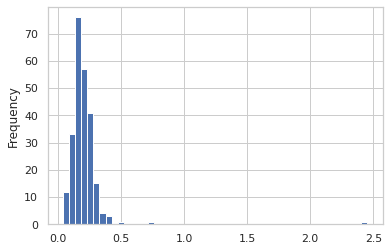

In [0]:
tips['tip_pct'].plot.hist(bins=50)  #evenly spaced bins

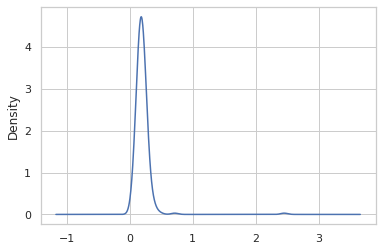

In [0]:
tips['tip_pct'].plot.density()

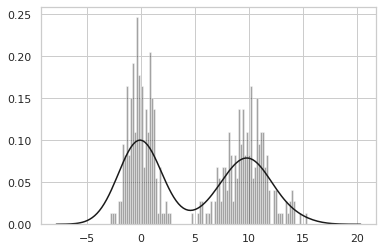

In [0]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k') #using seaborn

## Scatter or Point Plots

          cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

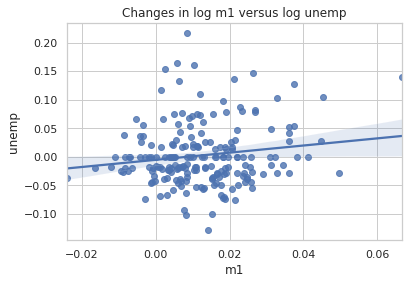

In [0]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
print(trans_data[-5:])
sns.regplot('m1', 'unemp', data=trans_data)
#regplot method makes a scatter plot and fits a linear regression line
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

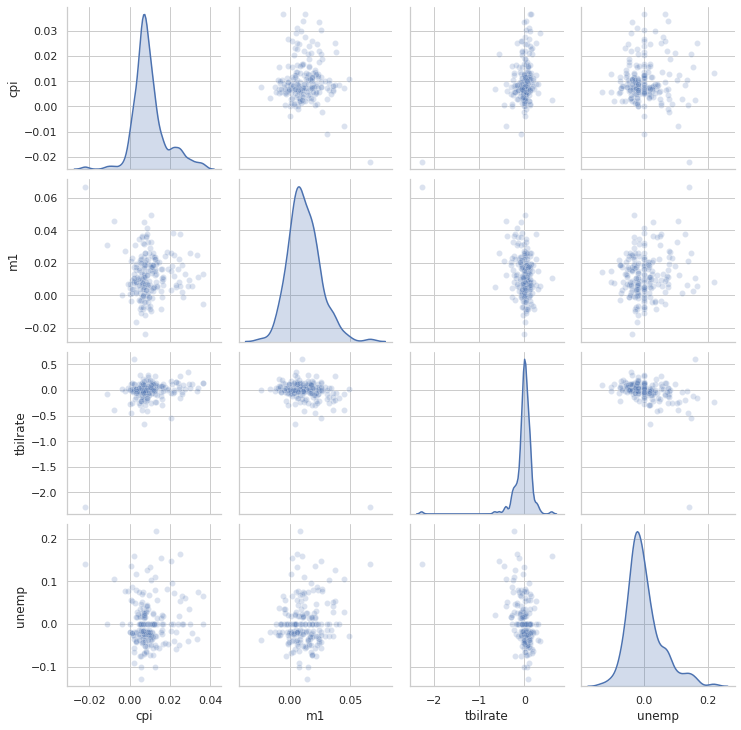

In [0]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})
#pairplot between variables

## Facet Grids and Categorical Data

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


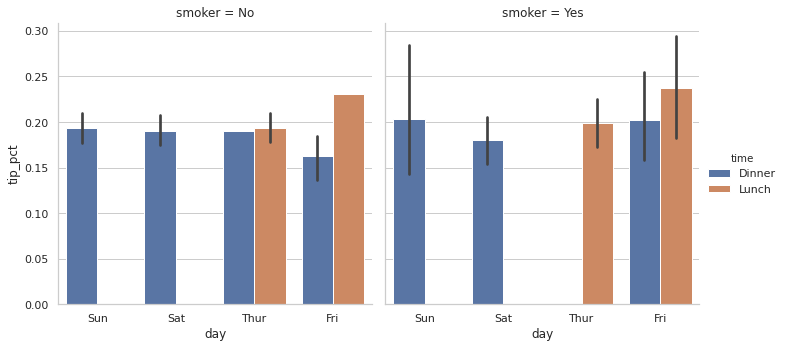

In [0]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


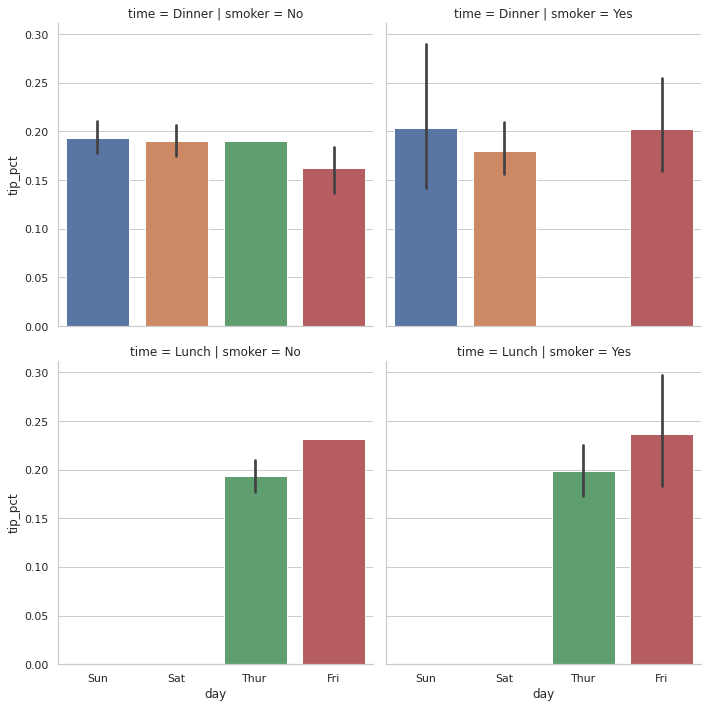

In [0]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


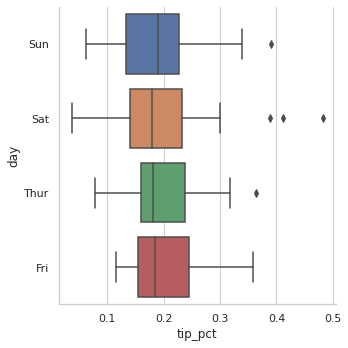

In [0]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])